In [1]:
from __future__ import division
from timeit import default_timer as timer
from numba import jit
import scipy
import numpy as np
from numpy.random import rand
from numpy import math
import matplotlib.pyplot as plt

# some initial values:
beta=0.47

In [2]:
def calcMagnetisation(spinconfig):
    '''Magnetization of a given configuration'''
    magnetisation=np.sum(spinconfig)
    
    return magnetisation

# initial rdm spin configuration:
def initialLattice(n):
    '''Create a nxn lattice with random spin configuration'''
    spinLattice = np.random.choice([1,-1], size=(n,n))
    return spinLattice

In [3]:
def mcMetroRandom(spinconfig,n , beta):
    ''' This is to execute the monte carlo moves using 
        Metropolis algorithm such that detailed
        balance condition is satisified'''
    for i in range(n):
        for j in range(n):
            a=np.random.randint(0,n) # looping over i & j therefore use a & b
            b=np.random.randint(0,n)
            spinlattice=spinconfig[a,b]   # is initvalue of spinLattice
            
            # Periodic Boundary Condition
            neighbours=spinconfig[(a+1)%n, b] + spinconfig[a, (b+1)%n] + spinconfig[(a-1)%n, b] + spinconfig[a, (b-1)%n]
            
            # change in energy:
            Delta_E=2*spinlattice*neighbours
            
            # using acceptance test:
            if Delta_E<0:
                spinlattice=-1*spinlattice
            elif np.random.random()< np.exp(-Delta_E*beta):
                spinlattice=-1*spinlattice
            
            # anyway: satisfing the detailed balance condition, 
            # ensuring a final equilibrium state. And new config is:
            spinconfig[a,b]=spinlattice
    return spinconfig

In [4]:
n = 4
nt = 100         #  number of temperature points
eqSteps = 100     #  number of MC sweeps for equilibration (default:1024)
mcSteps = 10000       #  number of MC sweeps for calculation (default:1024)

In [5]:
T = np.linspace(1.53, 3.28, nt);
M=np.zeros(nt)
Chi=np.zeros(nt)

In [6]:
norm_1 = 1.0/(mcSteps*n*n)
norm_2 = 1.0/(mcSteps*mcSteps*n*n)

In [7]:
Magnetizations = []

In [8]:
#----------------------------------------------------------------------
#  MAIN PART OF THE CODE
#----------------------------------------------------------------------
# Gittergröße 4:
for t in range(nt):
    M1=0; M2=0
    #E1 = M1 = E2 = M2 = 0
    spinconfig=initialLattice(n)
    beta = 1./T[t]
    #config = initialstate(N)
    #iT=1.0/T[tt]; iT2=iT*iT;
    
    for i in range(eqSteps):         # equilibrate
        mcMetroRandom(spinconfig, n, beta)
        #mcmove(config, iT)           # Monte Carlo moves

    for i in range(mcSteps):
        mcMetroRandom(spinconfig,n,beta)
        #mcmove(config, iT)           
        #Ene = calcEnergy(config)     # calculate the energy
        Mag=calcMagnetisation(spinconfig)
        #Mag = calcMag(config)        # calculate the magnetisation
        
        M1 += Mag
        M2 += Mag*Mag
        
    # appending the values (before that i only have one value, but i need like )
    M[t]=norm_1*M1
    Chi[t]=(norm_1*M2 - norm_2*M1*M1)*beta

In [13]:
MagSus4x4 = np.savetxt('MagSus4x4.txt', (M, Chi))

In [16]:
data4x4 = np.loadtxt('MagSus4x4.txt')

Magnetisation4x4 = data4x4[0]
Suszeptibility4x4 = data4x4[1]

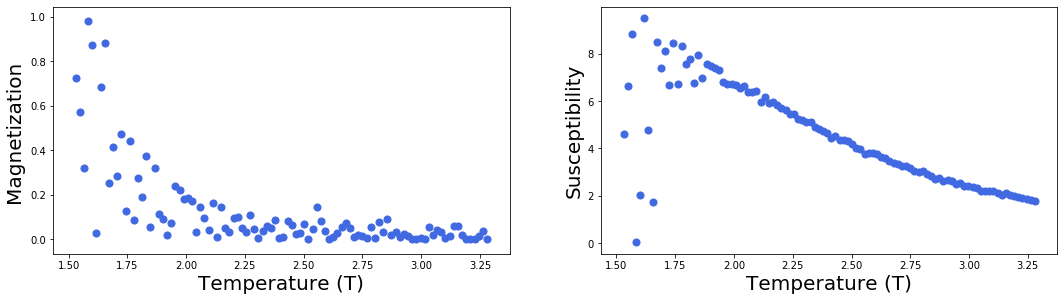

In [20]:
f = plt.figure(figsize=(18, 10)); # plot the calculated values 

sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, abs(Magnetisation4x4) , s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, SusSuszeptibility4x4, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');